In [10]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/kirill/Projects/nir')
sys.path.append('/home/kirilman/Projects/nir/nir/')
import myutils
import sequence_generator as generator
import numpy as np
import matplotlib.pylab as plt
from pomegranate import *
from myutils import frequency_occurrence
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.figsize':[18,6]})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
def get_anomal():
    alpha = ['a','b','c','d','e','f']
    N = 1000
    signal_1 = generator.Sequence(N,alpha, type = 'continue',
                                  params={'a': {'len': [30, 30], 'depend_on': False},
                                          'b': {'len': [20, 20], 'depend_on': False},
                                          'c': {'len': [15, 15], 'depend_on': False},                                       
                                          'd': {'len': [45, 45], 'depend_on': False},
                                          'e': {'len': [15, 15], 'depend_on': False},
                                          'f': {'len': [15, 15], 'depend_on': False},
                                         },     mean = [1, 10, 3, 2, 5, 15],
                                                variance = [1.25, 1.25, 1.25, 1.25, 1.25,1.25]).sequence

    signal_2 = generator.Sequence(N,alpha, type = 'continue',
                                   params={'a': {'len': [30, 30], 'depend_on': False},
                                           'c': {'len': [15, 15], 'depend_on': False},
                                           'b': {'len': [20, 20], 'depend_on': False},
                                           'd': {'len': [45, 45], 'depend_on': False},
                                           'e': {'len': [15, 15], 'depend_on': False},
                                           'f': {'len': [15, 15], 'depend_on': False},
                                     },     mean = [10, 15, 2, 4, 6, 1], 
                                            variance = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]).sequence

    Gen = generator.Sequence(N,alpha, type = 'continue',
                                   params={'a': {'len': [30, 30], 'depend_on': False},
                                           'c': {'len': [15, 15], 'depend_on': False},
                                           'b': {'len': [20, 20 ], 'depend_on': False},
                                           'd': {'len': [45, 45], 'depend_on': False},
                                           'e': {'len': [15, 15], 'depend_on': False},
                                           'f': {'len': [15, 15], 'depend_on': False},
                                     },     mean = [12, 15, 13, 7, 5, 12] , 
                                            variance = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
    signal_3 = Gen.get_abnormal_signal()
    
    test = [signal_1, signal_2, signal_3]
    # signal = np.array([signal_1, signal_2, signal_3]).T
    signal = []
    for a,b,c in zip(signal_1,signal_2,signal_3):
        signal += [[a,b,c]]
    return signal, Gen.path
anomal, abnormal_path = get_anomal()


345 390 1000
45
<class 'numpy.int64'>
45


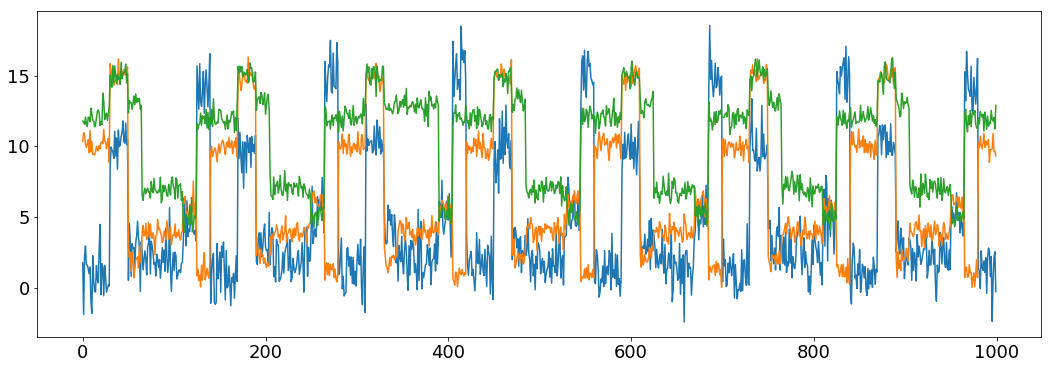

In [17]:
alpha = ['a','b','c','d','e','f']
n_comp = len(alpha)
N = 1000
signal_1 = generator.Sequence(N,alpha, type = 'continue',
                              params={'a': {'len': [30, 30], 'depend_on': False},
                                      'b': {'len': [20, 20], 'depend_on': False},
                                      'c': {'len': [15, 15], 'depend_on': False},                                       
                                      'd': {'len': [45, 45], 'depend_on': False},
                                      'e': {'len': [15, 15], 'depend_on': False},
                                      'f': {'len': [15, 15], 'depend_on': False},
                                     },     mean = [1, 10, 3, 2, 5, 15],
                                            variance = [1.25, 1.25, 1.25, 1.25, 1.25,1.25]).sequence

signal_2 = generator.Sequence(N,alpha, type = 'continue',
                               params={'a': {'len': [30, 30], 'depend_on': False},
                                       'c': {'len': [15, 15], 'depend_on': False},
                                       'b': {'len': [20, 20], 'depend_on': False},
                                       'd': {'len': [45, 45], 'depend_on': False},
                                       'e': {'len': [15, 15], 'depend_on': False},
                                       'f': {'len': [15, 15], 'depend_on': False},
                                 },     mean = [10, 15, 2, 4, 6, 1], 
                                        variance = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]).sequence

GenNormal = generator.Sequence(N,alpha, type = 'continue',
                               params={'a': {'len': [30, 30], 'depend_on': False},
                                       'c': {'len': [15, 15], 'depend_on': False},
                                       'b': {'len': [20, 20 ], 'depend_on': False},
                                       'd': {'len': [45, 45], 'depend_on': False},
                                       'e': {'len': [15, 15], 'depend_on': False},
                                       'f': {'len': [15, 15], 'depend_on': False},
                                 },     mean = [12, 15, 13, 7, 5, 12] , 
                                        variance = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
signal_3 = GenNormal.sequence

labels = list(map(myutils.rename_state,GenNormal.path))
test = [signal_1, signal_2, signal_3]
# signal = np.array([signal_1, signal_2, signal_3]).T
signal = []
for a,b,c in zip(signal_1,signal_2,signal_3):
    signal += [[a,b,c]]
# signal.shape
signal[:][0]
# anomal = GenNormal.get_abnormal_signal()
# anomal = [anomal, anomal, anomal]
plt.plot(anomal)

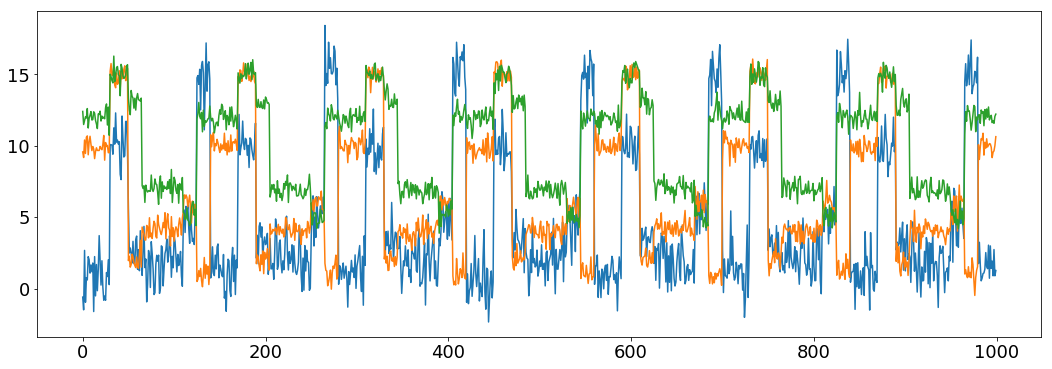

In [18]:
plt.plot(signal);

In [19]:
model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution , n_components = n_comp, X = [signal])


1000


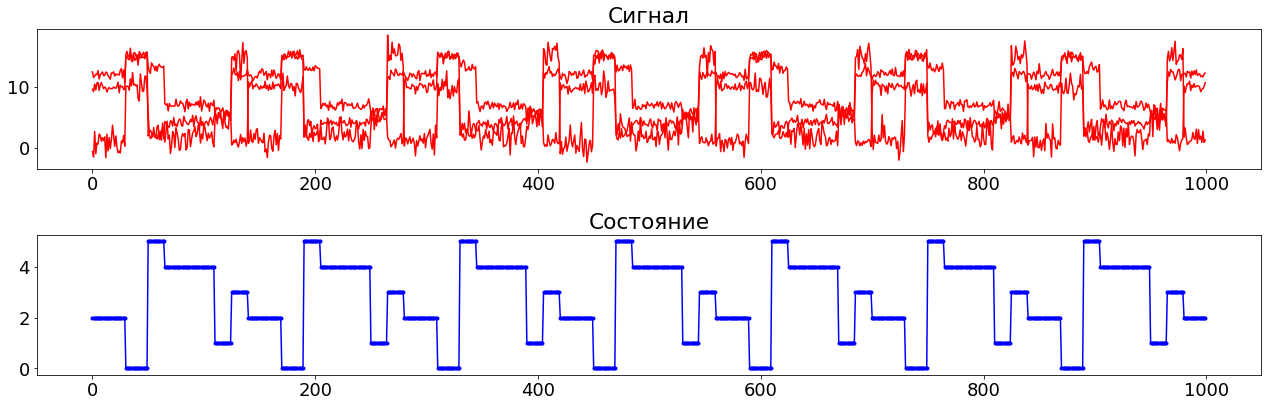

In [20]:
sequence_states = [x[0] for x in model.viterbi(signal)[1]][1:]
print(len(sequence_states))

fig, axes = plt.subplots(2,1)
axes[0].plot(signal,'r')
axes[0].set_title('Сигнал')
axes[1].set_title('Состояние')
axes[1].plot(sequence_states,'b')
axes[1].plot(sequence_states,'b.')
plt.tight_layout()
plt.savefig('состояние.jpeg')

1000


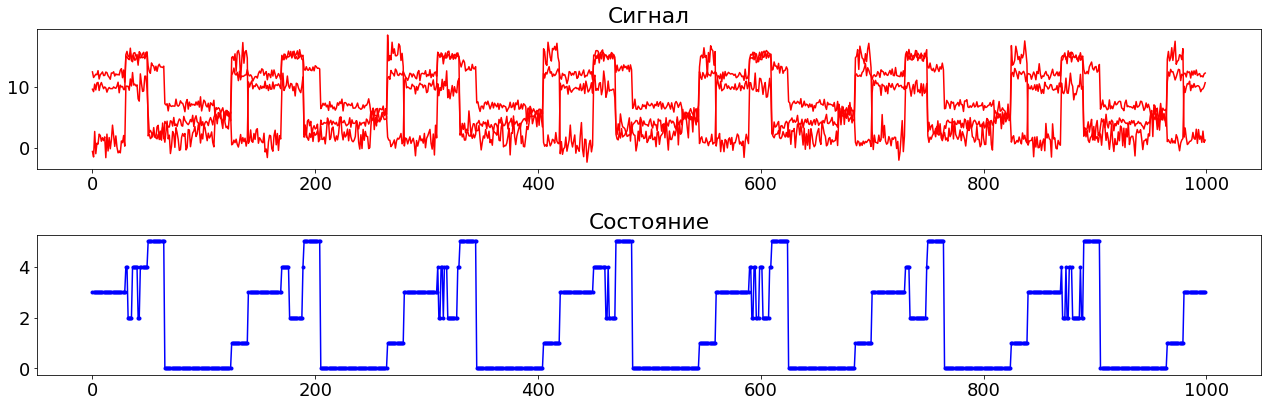

In [21]:
model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution , n_components = 6, X = [signal])
sequence_states = [x[0] for x in model.viterbi(signal)[1]][1:]
print(len(sequence_states))

fig, axes = plt.subplots(2,1)
axes[0].plot(signal,'r')
axes[0].set_title('Сигнал')
axes[1].set_title('Состояние')
axes[1].plot(sequence_states,'b')
axes[1].plot(sequence_states,'b.')
plt.tight_layout()
plt.savefig('состояние.jpeg')

1000


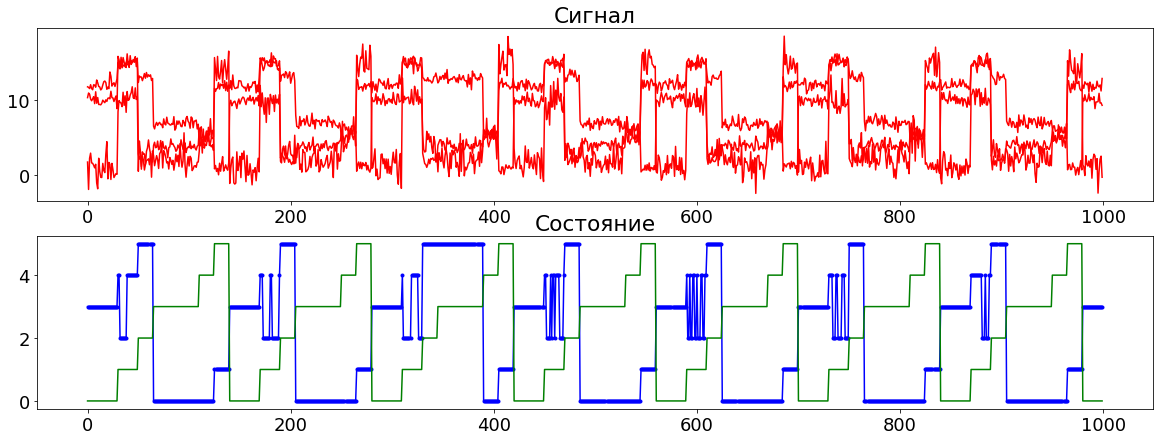

In [22]:
sequence_states = [x[0] for x in model.viterbi(anomal)[1]][1:]
print(len(sequence_states))

fig, axes = plt.subplots(2,1,figsize=(20,7))
axes[0].plot(anomal,'r')
axes[0].set_title('Сигнал')
axes[1].set_title('Состояние')
axes[1].plot(sequence_states,'b')
axes[1].plot(sequence_states,'b.')
axes[1].plot(abnormal_path,'g')
# plt.tight_layout()
plt.savefig('состояние.jpeg')

1000


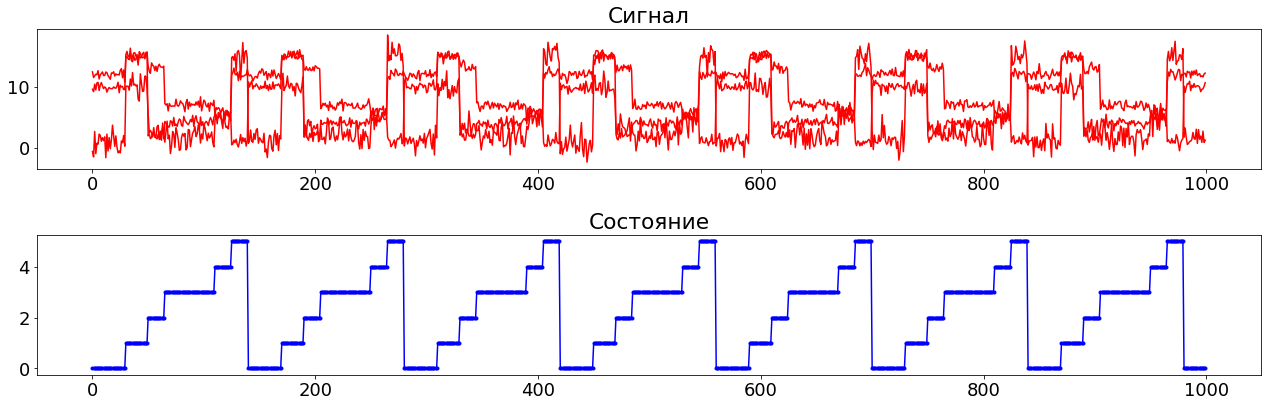

In [23]:
model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution , n_components = n_comp, X = [signal],
                                       labels = [labels], algorithm = 'labeled')
sequence_states = [x[0] for x in model.viterbi(signal)[1]][1:]
print(len(sequence_states))

fig, axes = plt.subplots(2,1)
axes[0].plot(signal,'r')
axes[0].set_title('Сигнал')
axes[1].set_title('Состояние')
axes[1].plot(sequence_states,'b')
axes[1].plot(sequence_states,'b.')
plt.tight_layout()
plt.savefig('состояние.jpeg')

1000


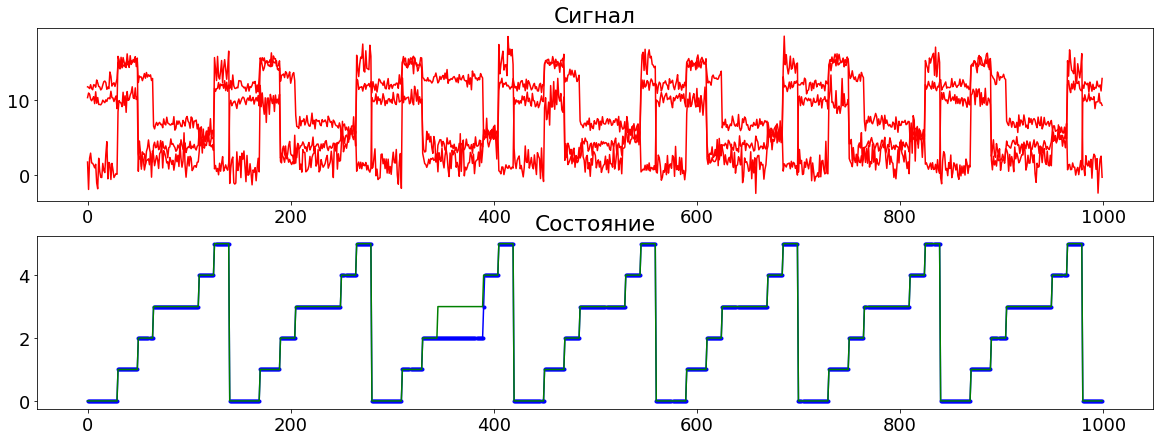

In [24]:
sequence_states = [x[0] for x in model.viterbi(anomal)[1]][1:]
print(len(sequence_states))

fig, axes = plt.subplots(2,1,figsize=(20,7))
axes[0].plot(anomal,'r')
axes[0].set_title('Сигнал')
axes[1].set_title('Состояние')
axes[1].plot(sequence_states,'b')
axes[1].plot(sequence_states,'b.')
axes[1].plot(abnormal_path,'g')
# plt.tight_layout()
plt.savefig('состояние.jpeg')

In [25]:
print(model.log_probability(anomal))
print(model.log_probability(signal))

-4167.084671745798
-3966.8857600942524
